In [1]:
import pandas as pd

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Setting color pallete for graphs

In [2]:
color_pallete =["#00876c",
                "#56a474",
                "#8ebf7f",
                "#c6da8e",
                "#fff4a4",
                "#f9ca7a",
                "#f29e5e",
                "#e77051",
                "#d43d51"]
sns.set_style('whitegrid')
sns.set_palette(color_pallete)

In [3]:
dataset = pd.read_csv("preprocessed_data.csv", index_col=0)

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.000000,3.000000,0
1,56,1,4.0,132.0,184.0,0.0,2.0,105.0,1.0,2.1,2.0,1.000000,6.000000,1
2,58,1,4.0,130.0,0.0,0.0,1.0,100.0,1.0,1.0,2.0,0.676375,6.000000,1
3,44,1,2.0,130.0,215.0,0.0,0.0,135.0,0.0,0.0,2.0,0.676375,5.087558,0
4,53,1,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.000000,7.000000,0


In [5]:
dataset.shape

(5520, 14)

## Box Plots

<AxesSubplot:xlabel='cp', ylabel='age'>

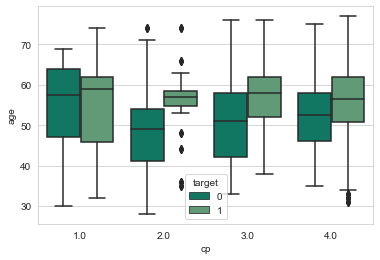

In [6]:
sns.boxplot(x='cp',y='age', hue="target",
            data=dataset,palette=color_pallete,)

<AxesSubplot:xlabel='slope', ylabel='thalach'>

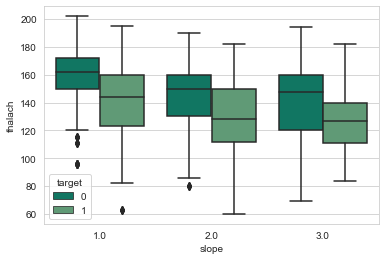

In [7]:
sns.boxplot(x='slope',y='thalach', hue="target",
            data=dataset,palette=color_pallete,)

## Histograms

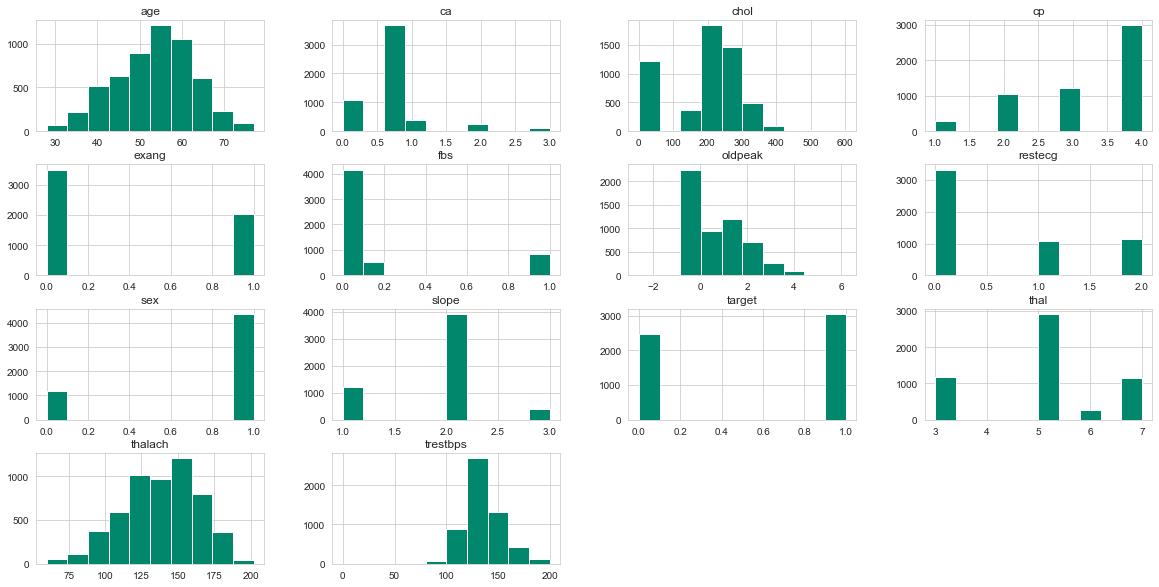

In [8]:
dataset.hist(figsize=(20,10))
plt.show()

### Histogram of Age

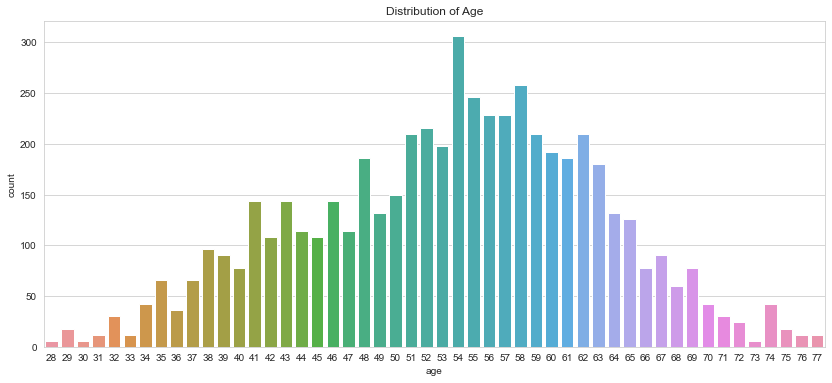

In [9]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Age")
plt.ylabel('Age')

sns.countplot(dataset['age'])

plt.show()

### Histogram of Sex

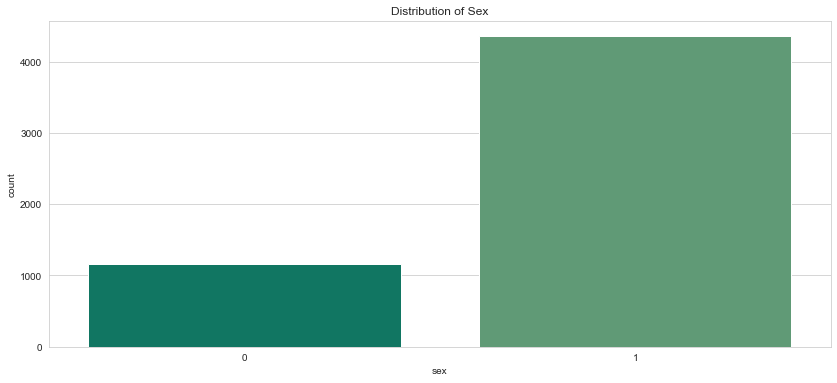

In [10]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Sex")
plt.ylabel('Sex')

sns.countplot(dataset['sex'])

plt.show()

### Histogram of Heart Attack

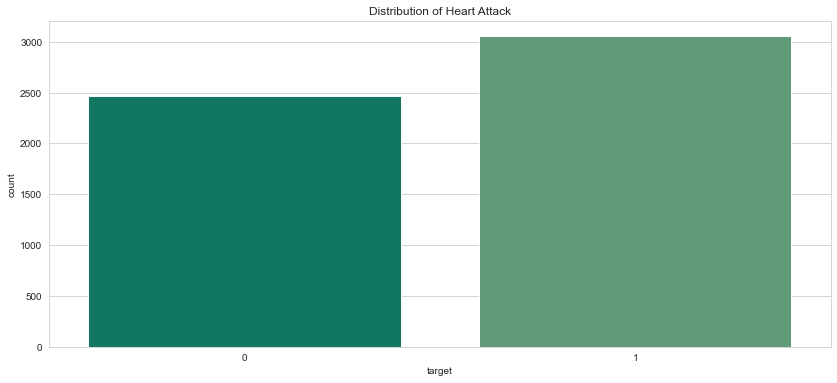

In [11]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Heart Attack")
plt.ylabel('Heart Attack')

sns.countplot(dataset['target'])

plt.show()

## Kde Plots

### Kdeplot for cholestrol

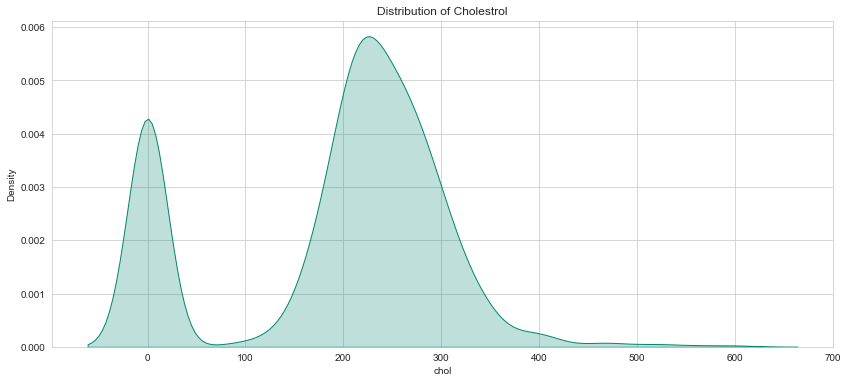

In [12]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Cholestrol")
sns.kdeplot(dataset['chol'], shade=True)

plt.show()

### Kdeplot for Resting Blood Pressure

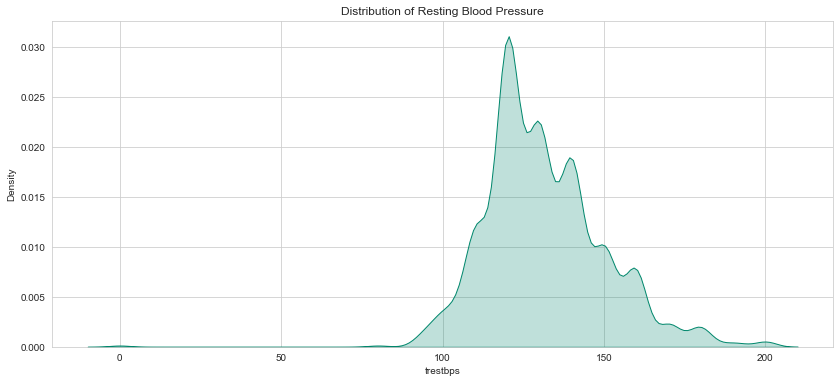

In [13]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Resting Blood Pressure")
sns.kdeplot(dataset['trestbps'], shade=True)

plt.show()

### Kdeplot for Maximum Heart Rate

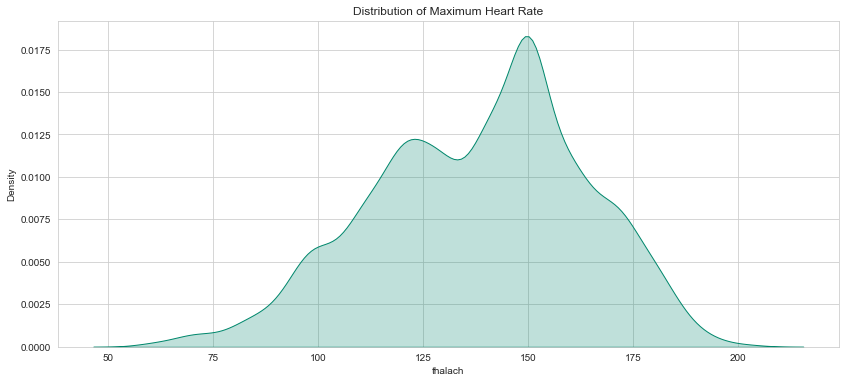

In [14]:
plt.figure(figsize=(14, 6))

plt.title("Distribution of Maximum Heart Rate")
sns.kdeplot(dataset['thalach'], shade=True)

plt.show()

## Cat plots

### Gender vs Target

<Figure size 1008x432 with 0 Axes>

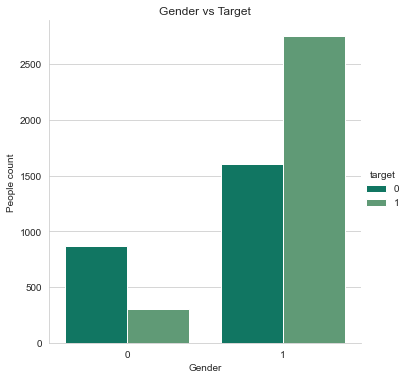

In [15]:
plt.figure(figsize=(14, 6))

sns.catplot('sex',data=dataset,hue='target',kind='count')

plt.title("Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("People count")

plt.show()

### Chest pain vs target

<Figure size 1008x432 with 0 Axes>

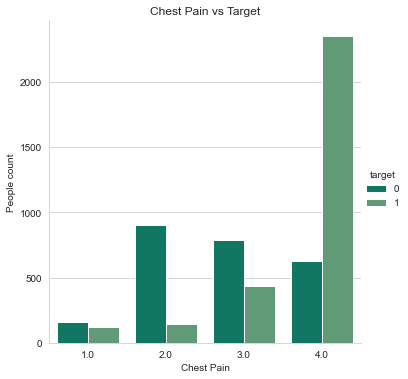

In [16]:
plt.figure(figsize=(14, 6))

sns.catplot('cp',data=dataset,hue='target',kind='count')

plt.title("Chest Pain vs Target")
plt.xlabel("Chest Pain")
plt.ylabel("People count")

plt.show()

### Fasting blood pressure vs Target

<Figure size 1008x432 with 0 Axes>

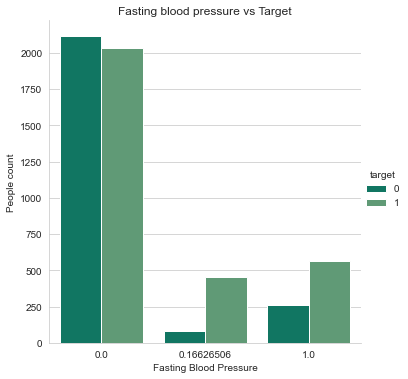

In [17]:
plt.figure(figsize=(14, 6))

sns.catplot('fbs',data=dataset,hue='target',kind='count')

plt.title("Fasting blood pressure vs Target")
plt.xlabel("Fasting Blood Pressure")
plt.ylabel("People count")

plt.show()

## Scatter plots

### Depression vs Max Heart Rate

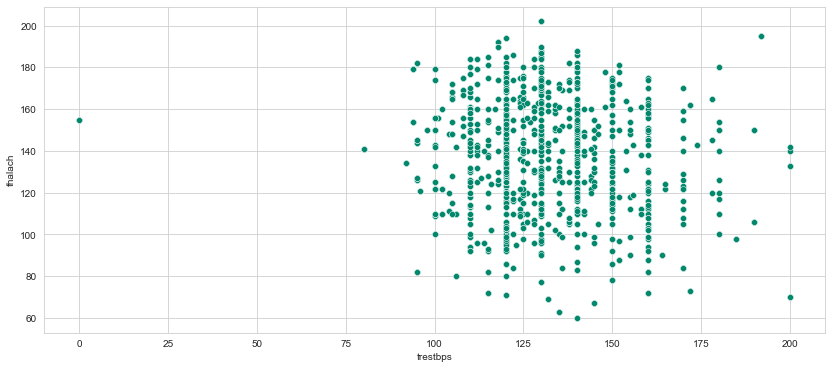

In [18]:
plt.figure(figsize=(14, 6))

sns.scatterplot(x=dataset['trestbps'], y=dataset['thalach'])

plt.show()

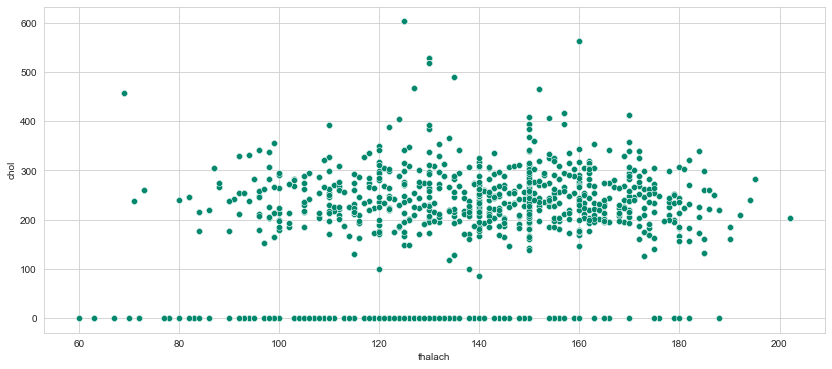

In [19]:
plt.figure(figsize=(14, 6))

sns.scatterplot(x=dataset['thalach'], y=dataset['chol'])

plt.show()

## Correlation

In [20]:
spearman_correlation = dataset.corr(method="spearman")
pearson_correlation = dataset.corr(method="pearson")

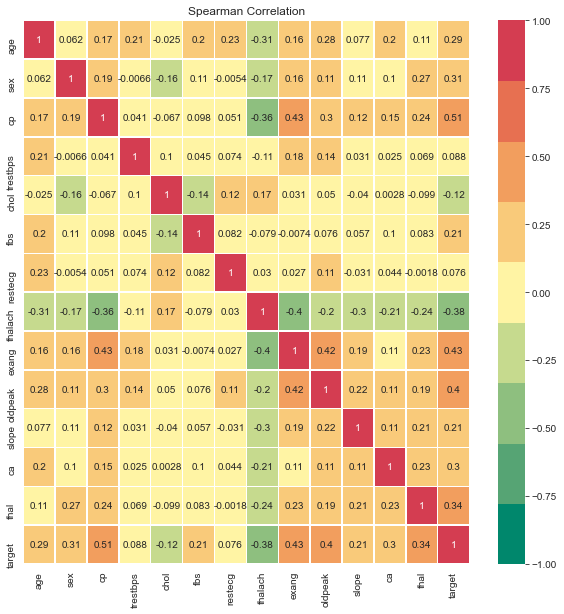

In [21]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(spearman_correlation, linewidths=0.5, annot=True,
            cmap=color_pallete, vmin=-1, vmax=+1)
plt.title("Spearman Correlation")
plt.show()

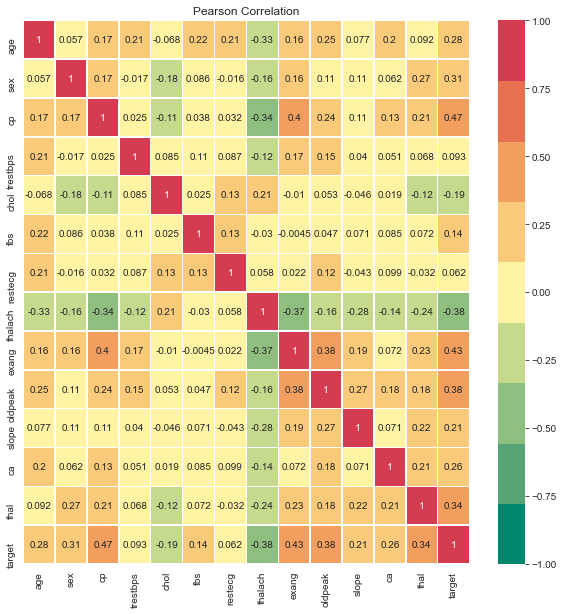

In [22]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(pearson_correlation, annot=True, linewidths=0.5,
            cmap=color_pallete, vmin=-1, vmax=+1)
plt.title("Pearson Correlation")
plt.show()

In [23]:
categorical = ["target",
"sex",
"cp",
"fbs",
"restecg",
"exang",
"slope",
"ca"]

## Pie Charts

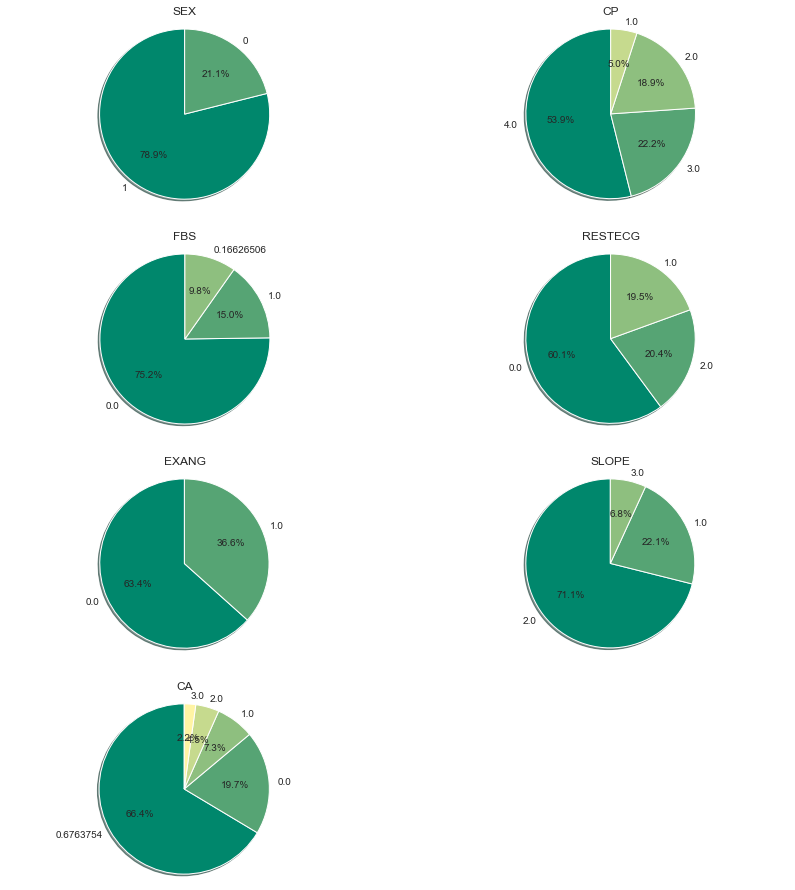

In [25]:
plt.figure(figsize=(14,20))
for i in range(1, 8):
    labels = dataset[categorical[i]].value_counts().index
    sizes  = dataset[categorical[i]].value_counts().values
    plt.subplot(5,2,i)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.xticks([])
    plt.yticks([])
    plt.title(categorical[i].upper())
plt.show()